# EDA

1 DATA INGESTION


2 EDA OF THE DATA 


3 PROCESSING OF THE DATA 


4 MODEL BUILDING 


5 MODEL EVALUTATION

In [142]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys

In [143]:
data=pd.read_csv("TSLA.CSV")

In [144]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [145]:
#univariate analysis

In [146]:
stock_data=data[["Date","Close"]]

In [147]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [148]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [149]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [150]:
stock_data=stock_data.set_index("Date")

In [151]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# EDA OF THE DATA

In [152]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [153]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


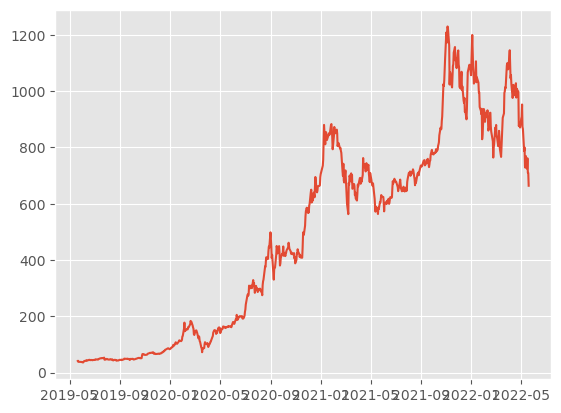

In [154]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

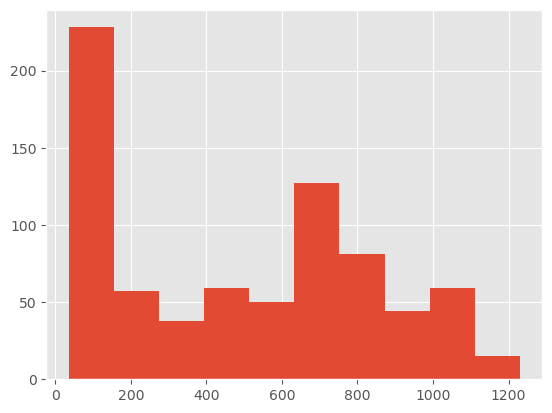

In [155]:
plt.hist(stock_data.Close)

In [156]:
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot: xlabel='Close', ylabel='Density'>

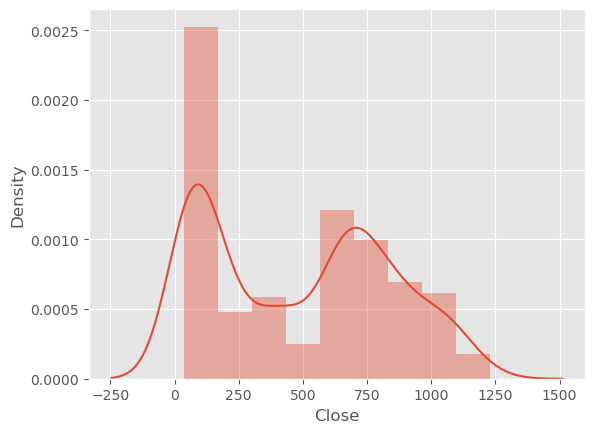

In [157]:
sns.distplot(stock_data.Close)

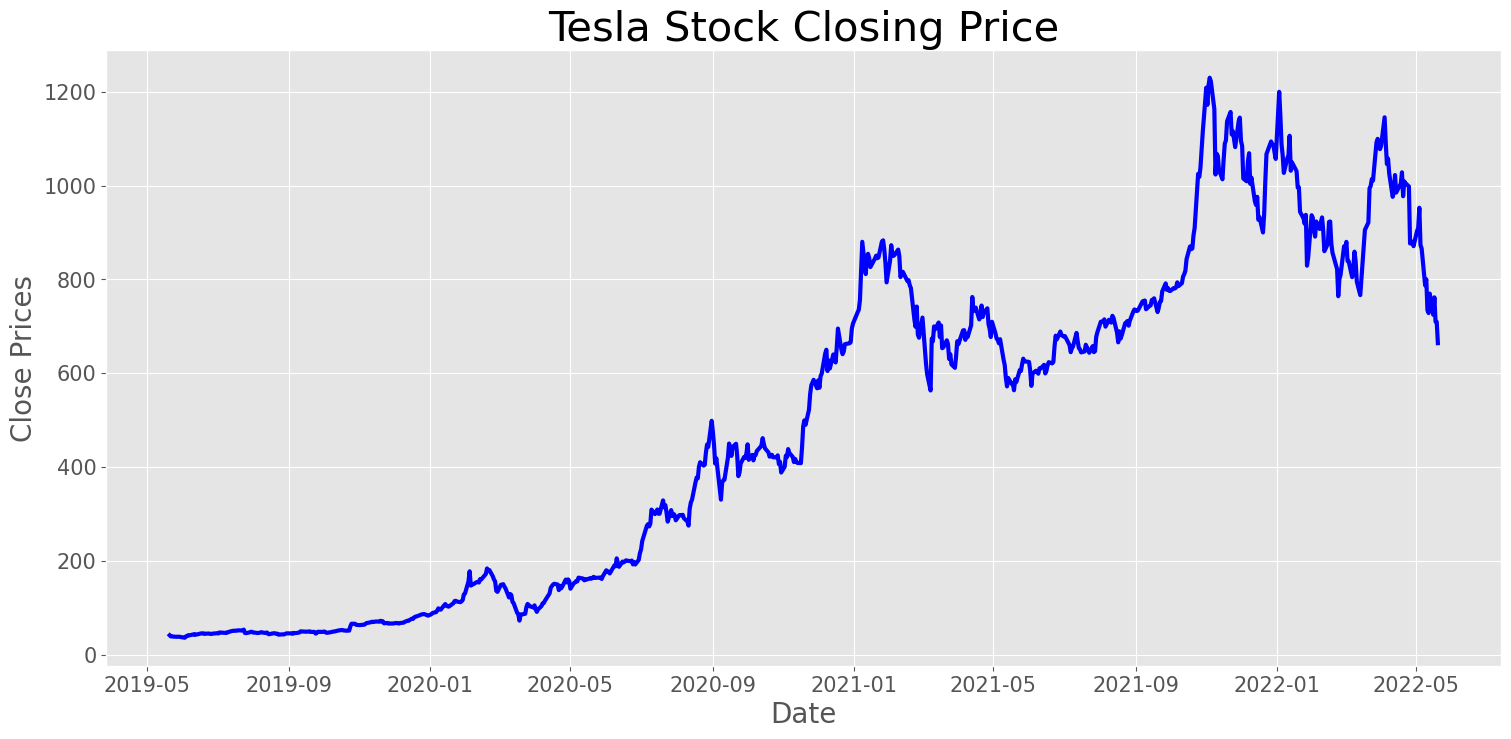

In [158]:
plt.style.use("ggplot")
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Date",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close Prices",fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data["Close"],linewidth=3,color="blue")
plt.title("Tesla Stock Closing Price", fontsize=30)
plt.show()

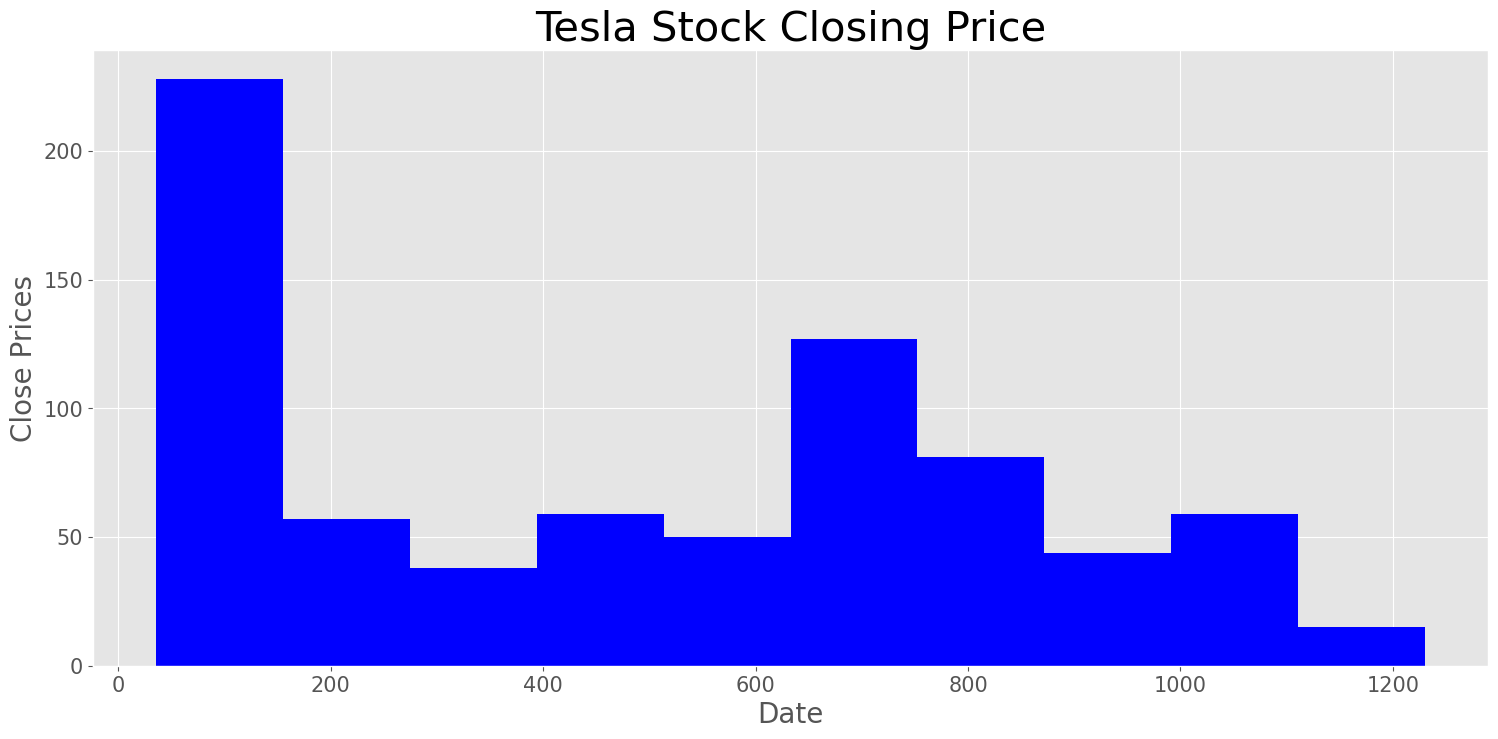

In [159]:
plt.style.use("ggplot")
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Date",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close Prices",fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data["Close"],linewidth=3,color="blue")
plt.title("Tesla Stock Closing Price", fontsize=30)
plt.show()

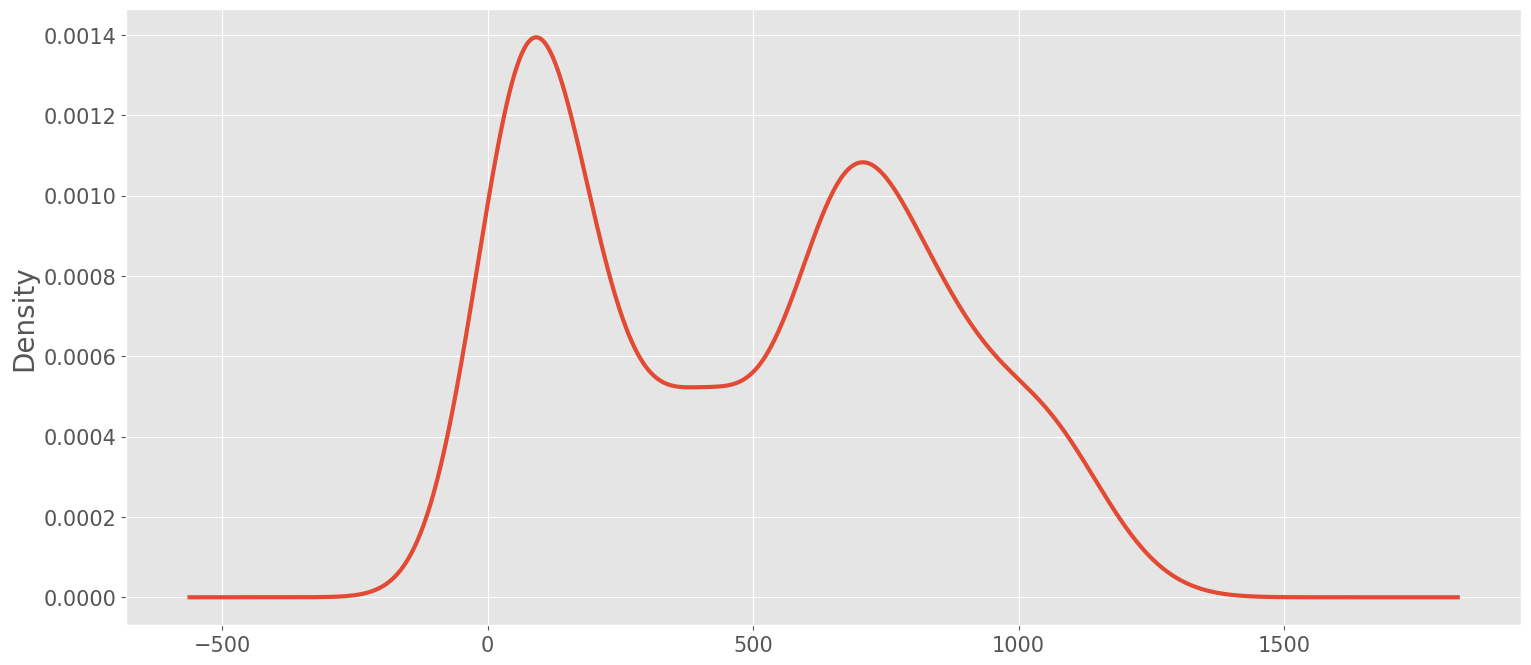

In [160]:
df_close=stock_data["Close"]
df_close.plot(kind="kde",figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel("Density",fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [161]:
stock_data["Close"]

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [162]:
rolling_mean=stock_data["Close"].rolling(120).mean()

In [163]:
rolling_mean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    957.764913
2022-05-17    954.869746
2022-05-18    951.484829
2022-05-19    948.380662
2022-05-20    944.438246
Name: Close, Length: 758, dtype: float64

In [164]:
rolstd=stock_data["Close"].rolling(120).std()

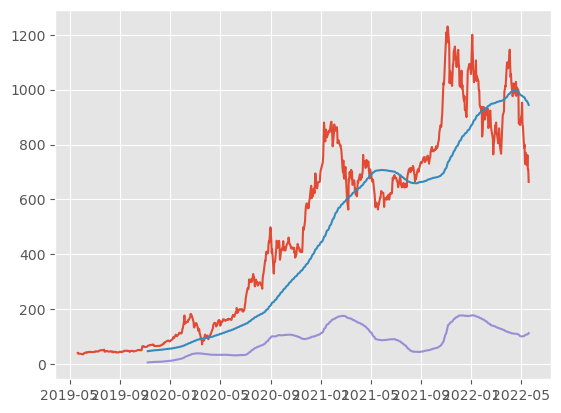

In [165]:
plt.plot(stock_data.Close)
plt.plot(rolling_mean)
plt.plot(rolstd)

In [166]:
from statsmodels.tsa.stattools import adfuller

In [167]:
adft=adfuller(stock_data.Close)

In [168]:
adft

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [169]:
pd.Series(adft[0:4],index=["test stats","p value","lag value","data points"])

test stats      -1.363009
p value          0.599876
lag value        9.000000
data points    748.000000
dtype: float64

In [214]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(48).mean()
    rolstd=timeseries.rolling(48).std()
    #plot
    plt.figure(figsize=(18,8))
    plt.grid("both")
    plt.plot(timeseries,color="blue",label="Original",linewidth=3)
    plt.plot(rolmean,color="red",label="rolling mean",linewidth=3)
    plt.plot(rolstd,color="black",label="rolling std",linewidth=4)
    plt.legend(loc="best",fontsize=20,shadow=True,facecolor="lightpink",edgecolor="k")
    plt.title("Rolling Mean and Standard Deviation",fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft=adfuller(timeseries,autolag="AIC")
    output=pd.Series(adft[0:4],index=["test stats","p value","lag value","data points"])
    for key,value in adft[4].items():
        output["Critical value (%s)"%key]=value
    print(output)

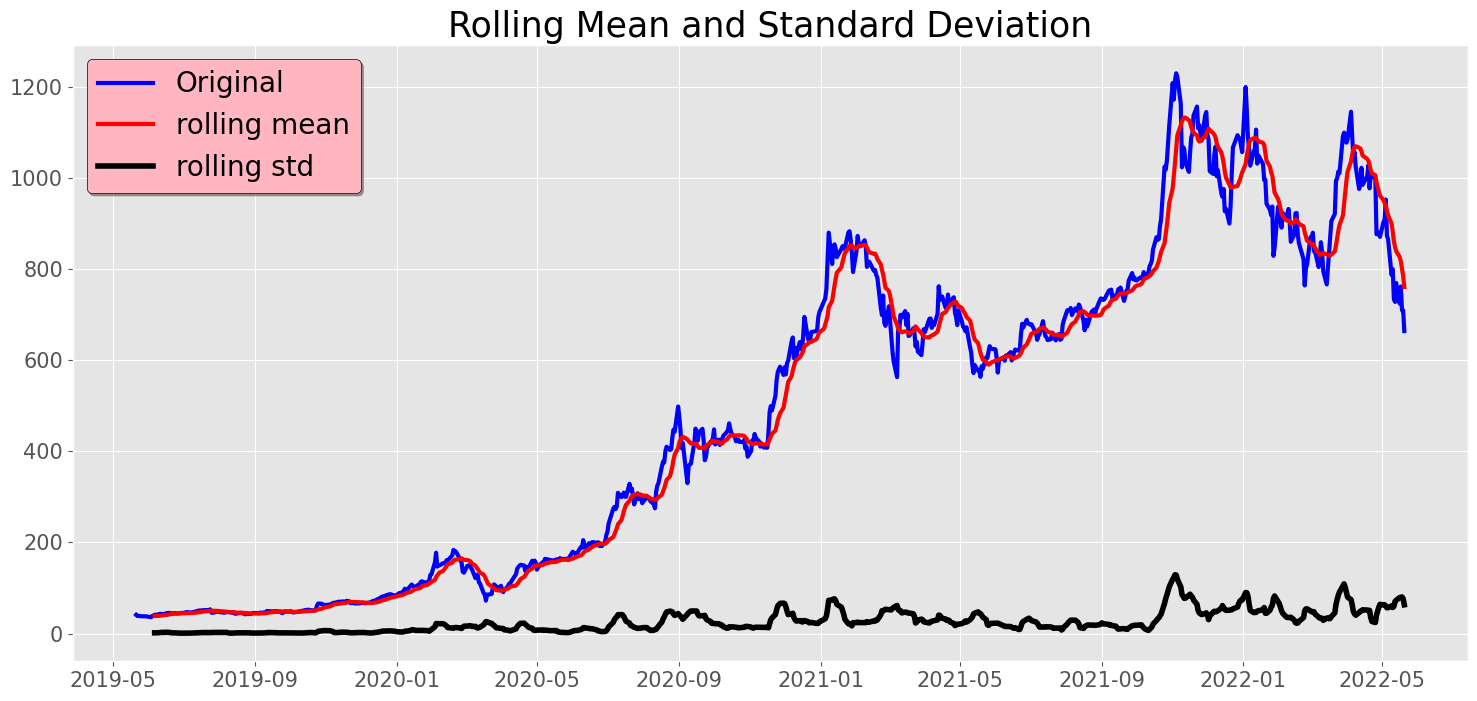

Results of dickey fuller test
test stats               -1.363009
p value                   0.599876
lag value                 9.000000
data points             748.000000
Critical value (1%)      -3.439123
Critical value (5%)      -2.865412
Critical value (10%)     -2.568832
dtype: float64


In [171]:
test_stationarity(stock_data.Close)

<AxesSubplot: >

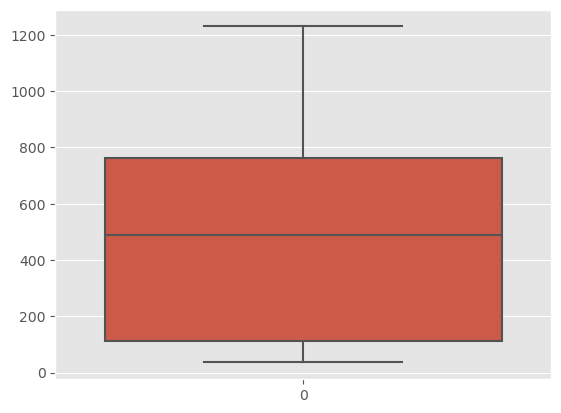

In [172]:
sns.boxplot(stock_data.Close)

# Time series Decompostion

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

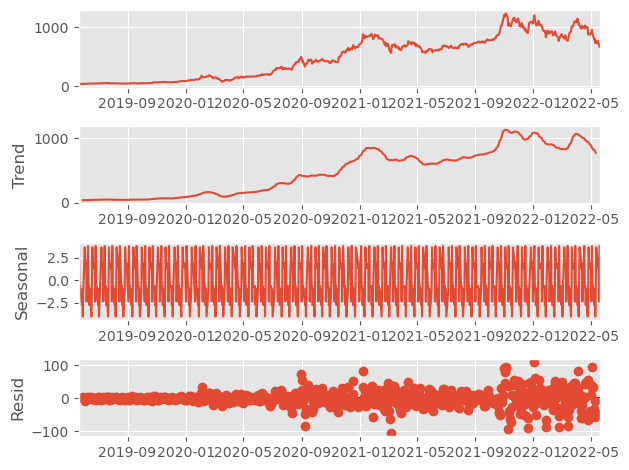

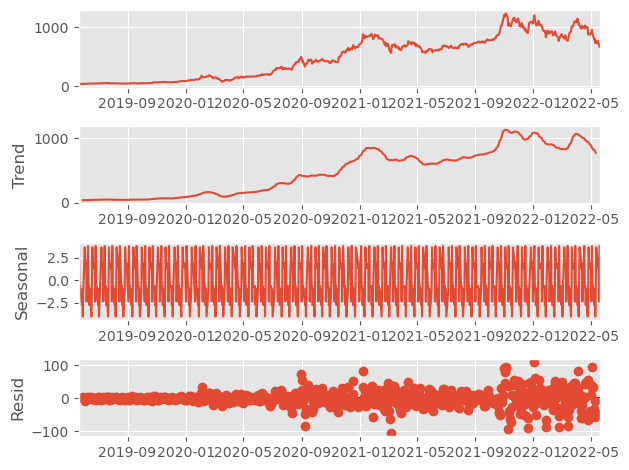

In [174]:
result.plot()

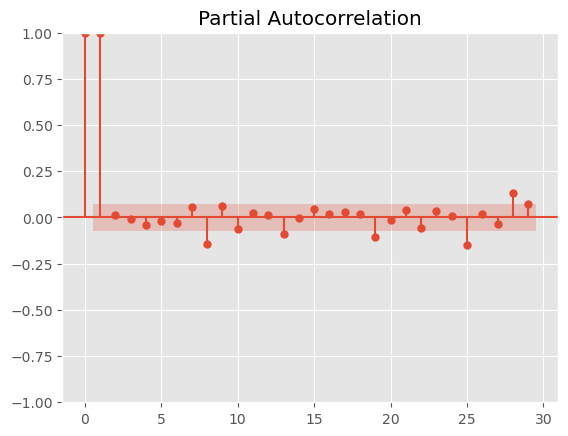

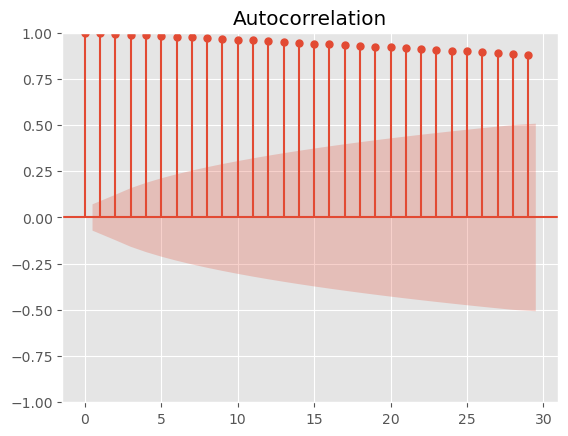

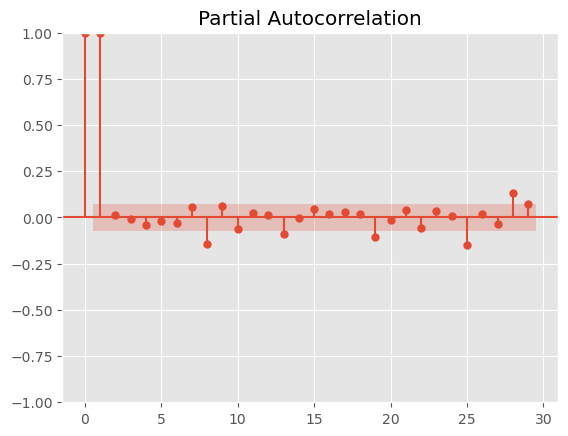

In [175]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# PREPROCESSING OF THE DATA 


1 FILL THE MISSING VALUES 

2 CONVERT DATA INTO THE STATIONARY TIME SERIES

3 IF NECESSARY THE NORMALIZE THE DATA 

4 SPLIT DATA INTO TRAIN AND TEST 

5 CLEAN THE DATA BY REMOVING THE OUTLIERS 

In [176]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [206]:
df_close=stock_data.Close

In [207]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [215]:
df_close=df_close.diff()

In [216]:
df_close=df_close.dropna()

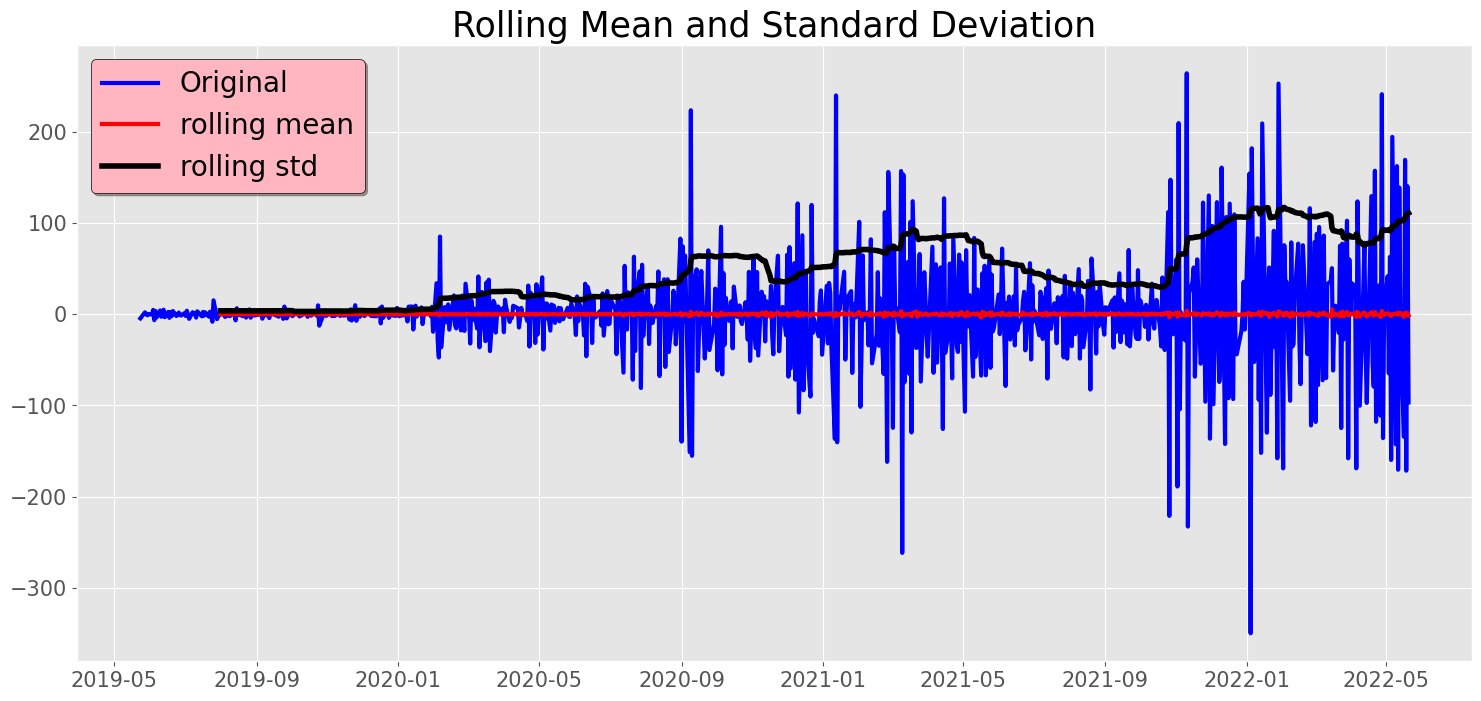

Results of dickey fuller test
test stats             -1.311785e+01
p value                 1.585467e-24
lag value               2.000000e+01
data points             7.340000e+02
Critical value (1%)    -3.439290e+00
Critical value (5%)    -2.865486e+00
Critical value (10%)   -2.568871e+00
dtype: float64


In [217]:
test_stationarity(df_close)

In [219]:
df_close[0:-60]

Date
2019-05-24     -4.545994
2019-05-28      2.110001
2019-05-29      0.031994
2019-05-30     -1.177994
2019-05-31      0.275997
                 ...    
2022-02-17     -2.290100
2022-02-18     75.670105
2022-02-22    -43.750000
2022-02-23     -5.960144
2022-02-24    116.260193
Name: Close, Length: 695, dtype: float64

In [220]:
df_close[-60:]

Date
2022-02-25   -121.850159
2022-02-28     79.090088
2022-03-01   -118.080017
2022-03-02     88.200012
2022-03-03    -77.700073
2022-03-04     95.720093
2022-03-07    -72.309998
2022-03-08     86.239929
2022-03-09    -38.780029
2022-03-10    -69.989868
2022-03-11     32.959900
2022-03-14     36.250061
2022-03-15     50.529968
2022-03-16    -61.680054
2022-03-17     -9.789917
2022-03-18      9.390015
2022-03-21    -20.440125
2022-03-22     75.070129
2022-03-23   -124.740051
2022-03-24     77.369995
2022-03-25    -27.769958
2022-03-28    102.569885
2022-03-29   -157.949890
2022-03-30     60.160034
2022-03-31      2.499878
2022-04-01     34.190063
2022-04-04     30.489990
2022-04-05   -168.919922
2022-04-06    123.739868
2022-04-07     48.310059
2022-04-08   -100.270020
2022-04-11     25.480042
2022-04-12     78.369995
2022-04-13    -36.180054
2022-04-14    -97.189941
2022-04-18    129.449951
2022-04-19    -52.089905
2022-04-20    -79.380127
2022-04-21    157.340088
2022-04-22   -117.84

# SPLIT DATA INTO TRAINING AND TESTING 

In [222]:
train_data=df_close[0:60]
test_data=df_close[-6,:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("dates",fontsize=20)
plt.ylabel("Closing price",fontsize=20)
plt.xticks(fontsize=15)
lt.yticks(fontsize=15)
plt.plot(train_data,"green",label="Train data",linewidth=5)
plt.plot(test_data,"blue",label="Test data",linewidth=5)
plt.legend(fontsize=20,shadow=tr)